<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/27.00-Cenario_Rio_apresentacao.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- O cenário da cidade do Rio de Janeiro: primeiras simulações](26.00-Cenario_Rio_primeiras_simulacoes.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 

---


# Modelo individual estocástico em tempos discretos adaptado ao município do Rio de Janeiro

**Objetivos:**

- Apresentar o modelo individual estocástico em tempos discretos utilizado por grupos como **Imperial/Pitt**, **UW/LANL** e **VBI**.

- Discutir as adaptações feitas para o Rio de Janeiro.

- Exibir algumas simulações para ilustração.

In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 11/Jun/2020


## Modelos baseados em indivíduos e o relatório do Imperial Colege

- O [Relatório do Imperial College de 16 de março](#Referências) influenciou ações políticas no Reino Unido e no mundo.

- Produzido pelo **Grupo de Resposta sobre o COVID-19 do Imperial College** *(Imperial College COVID-19 Response Team)*.

- Apresenta resultados da modelagem epidemiológica incluindo intervenções não-farmaceuticas (e.g. sem vacinação), como **distanciamento social** e **quarentena**.

- Modelos do tipo **individual, estocástico, espacialmente estruturado e com evolução temporal discreta**.

- Modelo usado por diversos grupos em um estudo após a epidemia de SARS (2002-2004):

    - Imperial College and the University of Pittsburgh **(Imperial/Pitt)**.

    - University of Washington and Fred Hutchinson Cancer Research Center in Seattle and the Los Alamos National Laboratories **(UW/LANL)**.

    - Virginia Bioinformatics Institute of the Virginia Polytechnical Institute and State University **(VBI)**.

## A importância da estrutura da rede de conexões

- A figura a seguir, retirada do livro [Kiss, Miller & Simon (2017)](#Referências), mostra a importância da estrutura da rede conexões na evolução da epidemia.

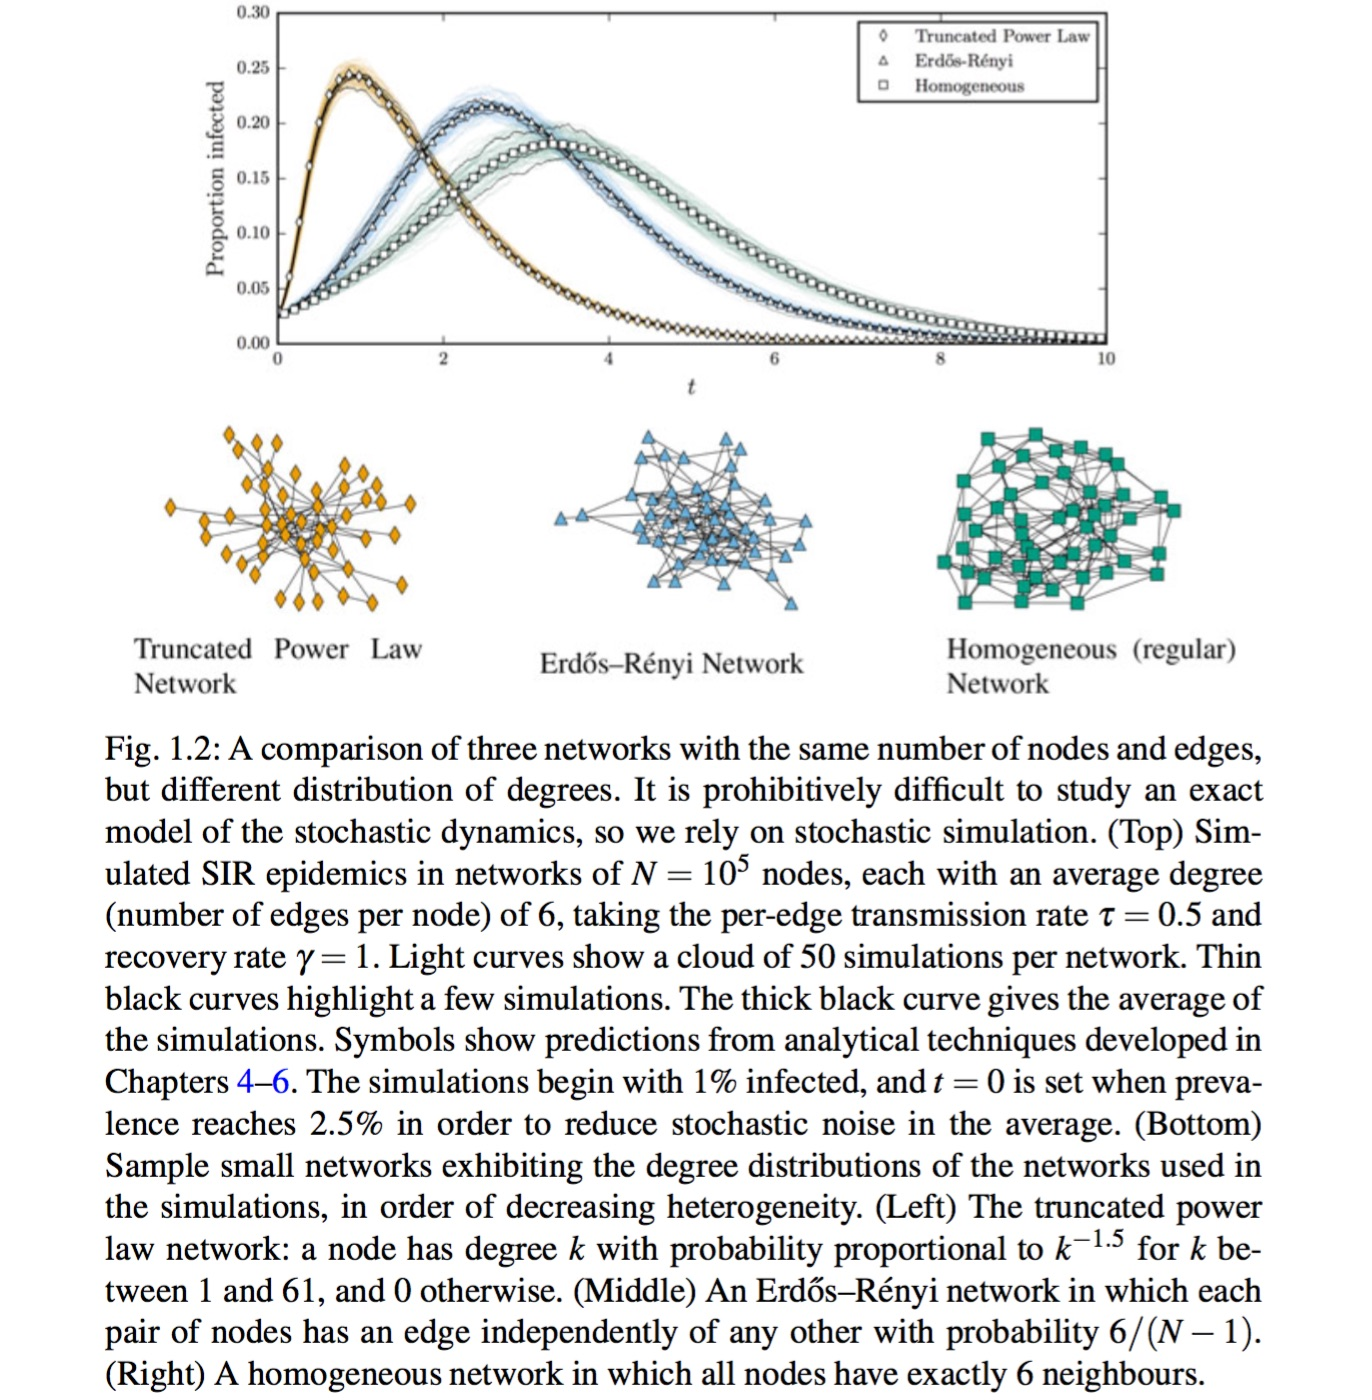

In [11]:
Image(filename=os.path.join('..', 'input', 'networks', 'SIR_on_different_networks.jpg'), width=800)

## Estrutura do modelo

- No artigo do [Ferguson et al (2006)](#Referências), o modelo também é de **simulações estocásticas espacialmente estruturadas e com evolução temporal discreta**

    - Neste, o modelo trata **cada indivíduo de acordo com alguns núcleos de interação:**

        - ligações familiares
        - escolas
        - trabalho
        - encontros aleatórios com a população em geral
        - etc.

    - O modelo evolui de maneira **probabilística** e em **tempos discretos** (1/4 de um dia = 6 horas).

    - Simulações de **85 milhões de indivíduos** vivendo na Tailândia e em uma vizinhança de 100km em outros países.

    - Mais detalhes do modelo deste artigo nas [notas suplementares](https://static-content.springer.com/esm/art%3A10.1038%2Fnature04017/MediaObjects/41586_2005_BFnature04017_MOESM1_ESM.pdf).

## Montando um cenário reduzido do Rio de Janeiro

In [5]:
%%time
tx_reducao = 1000
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

CPU times: user 6min 10s, sys: 20.1 s, total: 6min 30s
Wall time: 6min 39s


## Dados temporais para as simulações

In [7]:
dt = 1 # passo de tempo
t_0 = 0 # instante initial
num_dt = 80 # número de passos
dados_temporais = [t_0, dt, num_dt] # instantes de tempo

## Simulações

### Inicializa infecção

In [8]:
%%time
num_infectados_0 = 20 # número inicial de infectados
beta_r = 0.25 # taxa de contágio nas residências
beta_esc = 0.0 # taxa de contágio nas escolas
beta_emp = 0.25 # taxa de contágio no trabalho
beta_c = 0.15 # taxa de contágio na comunidade
gamma = 0.15 # inverso do tempo de recuperação

cenario_rio.inicializa_infeccao(num_infectados_0, beta_r, beta_esc, beta_emp, beta_c, gamma)

### Simulação

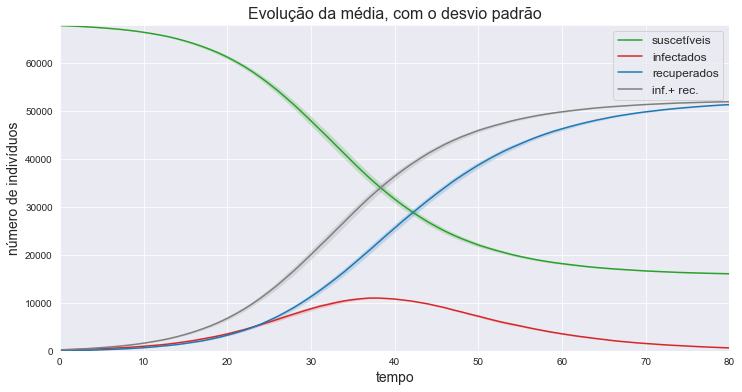

CPU times: user 38min 14s, sys: 23 s, total: 38min 37s
Wall time: 39min 26s


In [9]:
%%time
num_sim = 3
X = cenario_rio.evolui_jit(dados_temporais, num_sim, show='sd')

<!--NAVIGATOR-->

---
[<- O cenário da cidade do Rio de Janeiro: primeiras simulações](26.00-Cenario_Rio_primeiras_simulacoes.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 